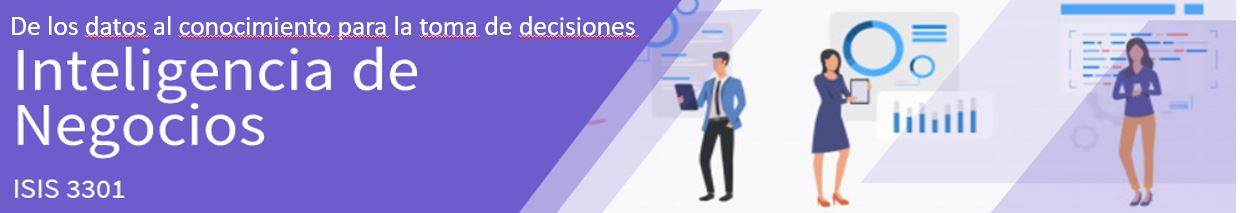

# Nota:
Hay varias celdas en el cuaderno que incluyen el coemtario: *# Error*. La idea es que identifiquen el error y lo corrigan. En la versión del profesor puedne encontrar los comando correctos en la celda correspondiente.

# Calidad de Datos
En este cuaderno revisaremos dos aspectos grandes de la calidad de datos:
* Carga:
  * Lectura de los Datos
  * Manipulación Básica
* Limpieza de Datos
  * Completitud
  * Duplicidad
  * Consistencia
  * Estandarización
* Perfilamiento de Datos
    * Visualización
    * Resumenes automáticos
    
Para la limpieza de los datos utilizaremos la libreria de **Pandas** (https://pandas.pydata.org/) y para la visualización de los datos, usaremos: **Seaborn**(https://seaborn.pydata.org/) y **Matplotlib** (https://matplotlib.org/). 

## Los Datos
Trabajaremos con una base de datos de canciones de Spotify. La base de datos original contiene alrededor de 600K canciones con diferentes caracteristicas musicales. Trabajaremos con una versión alterada de esta base de datos, ṕrecisamente para recalcar las técnicas que se quieren adquirir. 

La base de datos original, la pueden encontrar aquí: *https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks*

# Carga

## 1. Lectura

### 1.1 Librerias
En caso de no tener instaladas las librerias, recuerde que lo puede hacer desde la interfaz de Anaconda o directamente desde el cuaderno usando alguno de los siguientes comandos:

Si está usando Anaconda
```python
import sys
!conda install --yes --prefix {sys.prefix} pandas
```

Si está usando Pip
```python
import sys
!{sys.executable} -m pip install numpy
```

Si esta en GoogleColab
```python
!pip install numpy
```

In [1]:
# Librerias generales
# Pandas
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar
# Ranom seed
import numpy as np
np.random.seed(3301)

# Seaborn
import seaborn as sns 

# Matplolib
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
# Ubicacion de la base de datos
db_location = "./data/tracks.csv"

In [3]:
# Leer los datos
df_tracks = pd.read_csv(db_location)

In [ ]:
# Dimensiones de los datos
df_tracks.shape

In [ ]:
# Ver los datos
display(df_tracks.sample(5)) # Muestra de aleatoria de elementos
#display(df_tracks.head(5)) # Primeras Filas
#display(df_tracks.tail(5)) # Ultimas Filas

## 2. Manipulación Básica

In [ ]:
# Imprimimos los diferentes tipos de las columnas
df_tracks.dtypes

Todos estos tipod de objectos vienen de la libreria de Numpy o *np* (Pandas la usa extensivamente). Asi que en realidad cuando dice *float64* se refiere a *np.float64*.

Los elementos de tipo String corresponden al tipo *object* en Pandas

#### 2.1 Datos en Cadena de Texto
Elementos tipo *object*

In [ ]:
# Extraer el primer artista
# Diferentes opciones

# A pelo: usando arreglos y maniulacion de string
df_tracks['first_artist'] = [ s.replace('["','').replace('"]','').split('", "')[0] for s in df_tracks.artists] # Ejemplo 1
df_tracks['first_artist'] = [ s.split('"')[1] for s in df_tracks.artists] # Ejemplo 2

# Usando JSON
import json
df_tracks['first_artist'] = [ json.loads(s)[0] for s in df_tracks.artists] # Ejemplo 3

# En paralelo (funcion anonima)
df_tracks['first_artist'] = df_tracks.artists.apply(lambda s:  s.split('"')[1]) # Ejemplo 4

# En paralelo (Funcion definida)
def extract_first_artist(s):
    ob = json.loads(s)
    return(ob[0])

df_tracks['first_artist'] = df_tracks.artists.apply(extract_first_artist) # Ejemplo 5


# Muestra los resultados
# Unicamente las columnas relevantes
display(df_tracks[['artists','first_artist']].sample(10))

**Ejercicio 1**
Crear una nueva columna que se llame *second_artist* donde aparezca el segundo artista. En caso de solo tener un artista, esta columna debe ser nula (None)

In [ ]:
# Solucion

In [ ]:
# Seleccionar unicamente las filas con segundo artista
df_tracks[~df_tracks.second_artist.isna()] # Ejemplo 1
df_tracks.loc[~df_tracks.second_artist.isna(), ['artists','first_artist','second_artist']] # Ejemplo 2

In [ ]:
# Los 10 Artistas con mas canciones
# Usar la funcion value_counts() para contar el numero de veces que aparece un elemento.
df_tracks.first_artist.value_counts().to_frame().head(15)

#### 2.2 Datos Numéricos

In [ ]:
# Seleccionar las columnas numericas
# Error: 
number_cols = df_tracks.dtypes[df_tracks.dtypes == np.int64 or df_tracks.dtypes == np.float64].index

number_cols = df_tracks.select_dtypes(include = ['int','float']).columns
number_cols

In [ ]:
# Resumen
# Funcion: describe()
df_tracks[number_cols].describe()

In [ ]:
# Resumenes de una columna individual
df_tracks.duration_ms.mean()
df_tracks.duration_ms.sum()
df_tracks.duration_ms.std()

In [ ]:
# Operaciones entre vectores
# Nueva columna que significa la energia por ms
# Error:
df_tracks.energy_by_ms = df_tracks.energy / df_tracks.duration_ms

df_tracks[['name','energy_by_ms']]

**Ejercicio 2**
Revise los resumenes de las variables, ¿Hay alguna columna que le parezca que no sea numerica ordinal sino tal vez categorica?

¿Cómo se puede corregir? 

In [ ]:
# Solucion


#### 2.3 Datos de Fechas

In [ ]:
# la columna release_date deberia ser fecha pero es String
df_tracks.release_date.tail(10)

In [ ]:
# Miramos porque no se pueden volver fecha

# Una nueva columna con la fecha como objeto
# el atributo errors = 'coerce' hace que en caso de no poder transformar el valor, devuelve None
# o en el caso de las fechas: NaT
df_tracks['new_release_date'] = pd.to_datetime(df_tracks.release_date, errors = 'coerce')
df_tracks['new_release_date'].tail(10)

In [ ]:
# Miramos el problema
df_tracks.loc[df_tracks.new_release_date.isna(), ['release_date','new_release_date']] 

El problema es que hay canciones que solo tienen el año y lo tienen en el formato: Year ####

In [ ]:
# Corregimos
new_dates = df_tracks.release_date[df_tracks.new_release_date.isna()]
new_dates = new_dates.apply(lambda s: pd.to_datetime(str(s).replace('Year ','')))
df_tracks.loc[df_tracks.new_release_date.isna(),'new_release_date'] = new_dates 

# Mirar resultados
df_tracks[['release_date','new_release_date']].sample(10)

In [ ]:
# Agregar el año de lanzamiento
df_tracks['release_year'] = df_tracks.new_release_date.dt.year
df_tracks[['release_date','new_release_date','release_year']].sample(10)

**Ejercicio 3**
Crear una columna que se llame *days_since_released* donde se encuentren el numero de dias que han pasado desde que se lanzó la cancion. La idea es que busquen en internet como se hace esto para practicar la busqueda en foros.

In [ ]:
# Solucion


# Limpieza de Datos 

Comenzamos con la limpieza de datos. Este es un tema crucial en los proyectos de ML y en general de BI. Vamos a ver 4 aspectos de la limpieza de datos:
* Compeltitud
* Duplicidad
* Consistencia
* Estandarización

## 1 Completitud

Buscar registros con valores faltantes y decidir, desde el contexto del negocio, que se puede hacer con ellos. Por lo general podemos:
* Eliminar
* Reemplazar


#### 1.1 Eliminar Registros
Si la fila o la columna tiene un porcentaje muy alto de valores vacios, puede ser mejor eliminarla. Tambien, hay columnas importantes que no pueden tener valores faltantes, por ejemplo, columnas con identificadores necesarios para cruzar tablas o la columna de *valor objetivo* (más adelante veremos que significa esto)

In [22]:
# Ver el porcentaje de atributos vacios
df_porcentajes = (100*df_tracks.isna().sum()/len(df_tracks)).to_frame()
df_porcentajes.sort_values(0, ascending = False)

,0
decibel_range,99.828161
second_artist,81.682399
name,0.108696
instrumentalness,0.103244
id,0.100781
energy,0.099902
energy_by_ms,0.099902
valence,0.098847
loudness,0.098319
speechiness,0.097440


Vemos que hay varias columnas con porcentajes pequeños de valores faltantes algunas numericas y otras categoricas. Las columnas *decibel_range* y *second_artist* tienen numeros altos. Podemos descartar decibel range para evitar "ruido" en los datos y conservar *second_artist* ya que sabemos que es normal que una cancion no tenga segundo artista.  

In [ ]:
# Eliminar la columna: decibel_range
# Error: 
df_tracks.drop('decibel_range', axis = 1, inplace = True)

df_tracks.columns

**Ejercicio 4**
Crer un arreglo con todas las variables no numericas y llamarlo *non_number_cols*

In [ ]:
# Solución


In [25]:
# Como lo que queremos es eliminar las filas que tengan valores vacios en estas columnas
# debemos quitar second artist del conjunto ya que tiene un alto numero de vacios, pero
# por el contexto, sabemos que es normal.
non_number_cols = [ col for col in non_number_cols if col != 'second_artist']

In [26]:
# Elimina las filas que tengan valores nulos en las columnas categoricas
df_tracks.dropna(subset = non_number_cols, inplace = True )

In [ ]:
# Revisamos
df_porcentajes = (100*df_tracks[non_number_cols].isna().sum()/len(df_tracks)).to_frame()
df_porcentajes.sort_values(0, ascending = False)

#### 1.2 Asignar Valores
Otra técnica es remplazar los valores faltantes por valores represntativos. En este caso, vamos a remplazar en los valores numericos por el promedio.

In [ ]:
# Volvemos a sacar las columnas numericas
number_cols = df_tracks.dtypes[(df_tracks.dtypes == np.int64) | (df_tracks.dtypes == np.float64)].index

# Iteramos sobre las columnas numericas y para cada una asignamos su valor promedio.
for col in number_cols:
    df_tracks[col].fillna(df_tracks[col].mean(), inplace = True)

In [ ]:
# Revisamos
df_porcentajes = (100*df_tracks.isna().sum()/len(df_tracks)).to_frame()
df_porcentajes.sort_values(0, ascending = False)

Vemos que unicamente la columna *second_artist* tiene valores faltantes, como queriamos.

**Pregunta**
¿Qué se puede hacer con valores categoricos o de fecha para no eliminarlos?

**Respuesta**: Para los categoricos, se podria asignar la moda (en caso de tener una moda significativa) y para las fechas se podria asignar el promedio. Esto **siempre** debe decidirse desde contexto. Si son variables muy relevantes en el análisis, tal vez sea mejor eliminarlas para evitar entrenar con ruido los modelos. La palabra final la tiene el negocio.    

## 2. Duplicidad
Identificar las filas que tienen valores idénticos, ya sea en todas sus columnas o en aquellas que deben tener valores únicos, como lo puede ser el identificador o alguna combinación única de columnas: nombre de canción, artista y año.

In [ ]:
# Revisamos cada columna para ver cuantos valores repetidos tiene
# el comando duplicated() no dice que filas tinen valores duplicados.
for col in non_number_cols:
    num_duplicated = df_tracks.duplicated(subset = col).sum()
    print(f"{col}: {num_duplicated}")

In [ ]:
# Mirar en detalle
# El parametro keep, nos dice si incluir la primera, la ultima o todas (False)
df_tracks[df_tracks.duplicated(subset = 'id', keep = False)].sort_values('id')

La columna de *id* debe ser única, por lo que es neceario eliminar las filas duplicadas. Además, vemos que tienen el mismo nombre y artista pero valores diferentes en las otras columnas, lo que generaria inconcistencía si las mantenemos.

Hay que revisar si es mejor eliminar **todas** las filas que tienen duplicados o simplemente eliminar las copias que puedan existir de cada fila. Esto se decide con base al número de filas que hayan duplicadas, si tenemos alguna forma de saber cual es la fila "correcta" o las consecuencias que tendria quedarse con una fila que represente un valor incorrecto por eliminar la verdadera pensando que es su copia.

In [ ]:
# Eliminar los duplicados
df_tracks.drop_duplicates(subset = 'id', keep = 'first', inplace = True)

## 3. Consistencia
Este proceso se basa en tener consistencia entre los diferentes valores de la columna. Es decir, que:
* No se tengan difrentes cadenas o numeros para la misma categoria en una columna con valores categóricos.
* Que los números dentro de una columna categórica pertenezcan a un rango establecido.
* Que las fechas de una columna se encuentren dentro de un rango de fechas establecido.

Hay casos donde estos valores se pueden identificar directamente, como veremos en el siguiente ejemplo, pero hay casos en los que se necesita una definición de los valores o rangos correctos desde negocio.

#### 3.1 Categoricos

In [ ]:
# Revisamos los valores de la unica variable categorica: mode
df_tracks['mode'].value_counts()

In [ ]:
df_tracks.loc[df_tracks['mode'].apply(lambda s: str(s).upper() == 'OTHER'),'mode'] = 'O'
df_tracks['mode'].value_counts()

#### 5.2 Numericos

In [ ]:
# Resumen
df_tracks[number_cols].describe()

**Ejercicio 5**
Rescalar la variable *loudness* para que tenga como minimo 0 y como maximo 1 y se encuentre en el mimso rango de las demas variables.

In [ ]:
# Solucion

In [ ]:
# Confirmar
df_tracks[['loudness']].describe()

## 4. Estandarización

La estandarización de datos hace referencia a que la representación de de los valores de las columnas cumpla un cierto estandar a través de la organización, garantizando que se pueden juntar o comparar columnas entre diferentes tablas. De nuevo, estos estandares por lo general vienen preestablecidos y el proceso de estandarización debe simplemente acoplarse a ellos.

In [ ]:
# Cambiar las categorias de M, m y O por Major, Minor y Other (respectivamente) para que sean consistentes con 
# otras tablas
df_tracks['mode'].replace({'M}':'Major', 'm':'Minor', 'O':'Other'}, inplace = True)
df_tracks['mode'].value_counts()

# Perfilamiento de Datos

## 1. Visualización de Datos
Para la visualización, se puede utilizar tanto Seaborn como Matplotlib

Nos concentraremos en los datos de los mejores 20 artistas para facilitar la visualizacion

In [ ]:
# Extraemos los artistas mas populares
top = 20
df_top = df_tracks[['first_artist','popularity']].groupby('first_artist').sum().sort_values('popularity',ascending = False).head(20)
df_top

### 1.1 Diagramas de Temporales

In [ ]:
df_plot = df_tracks[df_tracks.first_artist.isin(df_top.index)]
df_plot.shape

In [ ]:
# Matplotlib
fig=plt.figure(figsize=(12,8))
# Error: 
plt.plot(df_plot['new_release_date'],df_plot['popularity'])
plt.show()

In [ ]:
# Seaborn
fig=plt.figure(figsize=(12,8))
sns.lineplot(data = df_plot, x = 'new_release_date', y = 'popularity')

### 1.2 BoxPlots

In [ ]:
fig=plt.figure(figsize=(12,8))
ax = sns.boxplot(x="first_artist", y="popularity", data=df_plot)
d = ax.set_xticklabels(ax.get_xticklabels(),rotation = 70)

### 1.3 Histogramas

In [ ]:
fig=plt.figure(figsize=(12,8))
sns.histplot(data=df_plot, x="danceability", kde=True)

### 1.4 ScatterPlots

In [ ]:
fig=plt.figure(figsize=(12,8))
sns.scatterplot(data=df_plot, x="popularity", y='acousticness')

Al final del dia seaborn esta construido sobre matplotlib, por lo que esta ultima siempre va a ser mas poderosa. Si necesitan algo rápido: seaborn, algo muy especifico: matplotib.

## 2. Reportes Automaticos

Para los reportes automaticos, se puede usar al herramienta de pandas profiling.


Para cada columna, genera las siguientes estadísticas, si son relevantes para el tipo de columna, se presentan en un informe HTML interactivo:

1. Inferencia de tipo: detecta los tipos de columnas en un dataframe.
2. Esenciales: tipo, valores únicos, valores faltantes.
3. Estadísticas de cuantiles como valor mínimo, Q1, mediana, Q3, máximo, rango, rango intercuartílico. Esta opción es bastante útil para identificar datos atípicos.
4. Estadísticas descriptivas como media, moda, desviación estándar, suma, desviación absoluta mediana, coeficiente de variación, curtosis, asimetría.
5. Valores más frecuentes.
6. Histogramas.
7. Correlaciones destacando variables altamente correlacionadas, matrices de Spearman, Pearson y Kendall. Esto permite descubrir relaciones entre atributos.
8. Matriz de valores faltantes, recuento, mapa de calor y dendrograma de valores faltantes

Tomado de la librería oficial de pandas_profiling en [github](https://github.com/pandas-profiling/pandas-profiling)

Lo más importante al utilizar esta librería es recordar que lo fundamental son los análisis que hagamos sobre estos reportes.

In [ ]:
import pandas_profiling

profiling =pandas_profiling.ProfileReport(df_tracks)
profiling

In [ ]:
profiling.to_file("spotify_db_profile.html")